In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

In [11]:
train_df=pd.read_csv(r"C:\Users\MAYANK KUMAR\OneDrive\Desktop\OneDrive - K.R. MANGALAM UNIVERSITY\train.csv")
test_df=pd.read_csv(r'C:\Users\MAYANK KUMAR\OneDrive\Desktop\OneDrive - K.R. MANGALAM UNIVERSITY\test.csv')

In [12]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


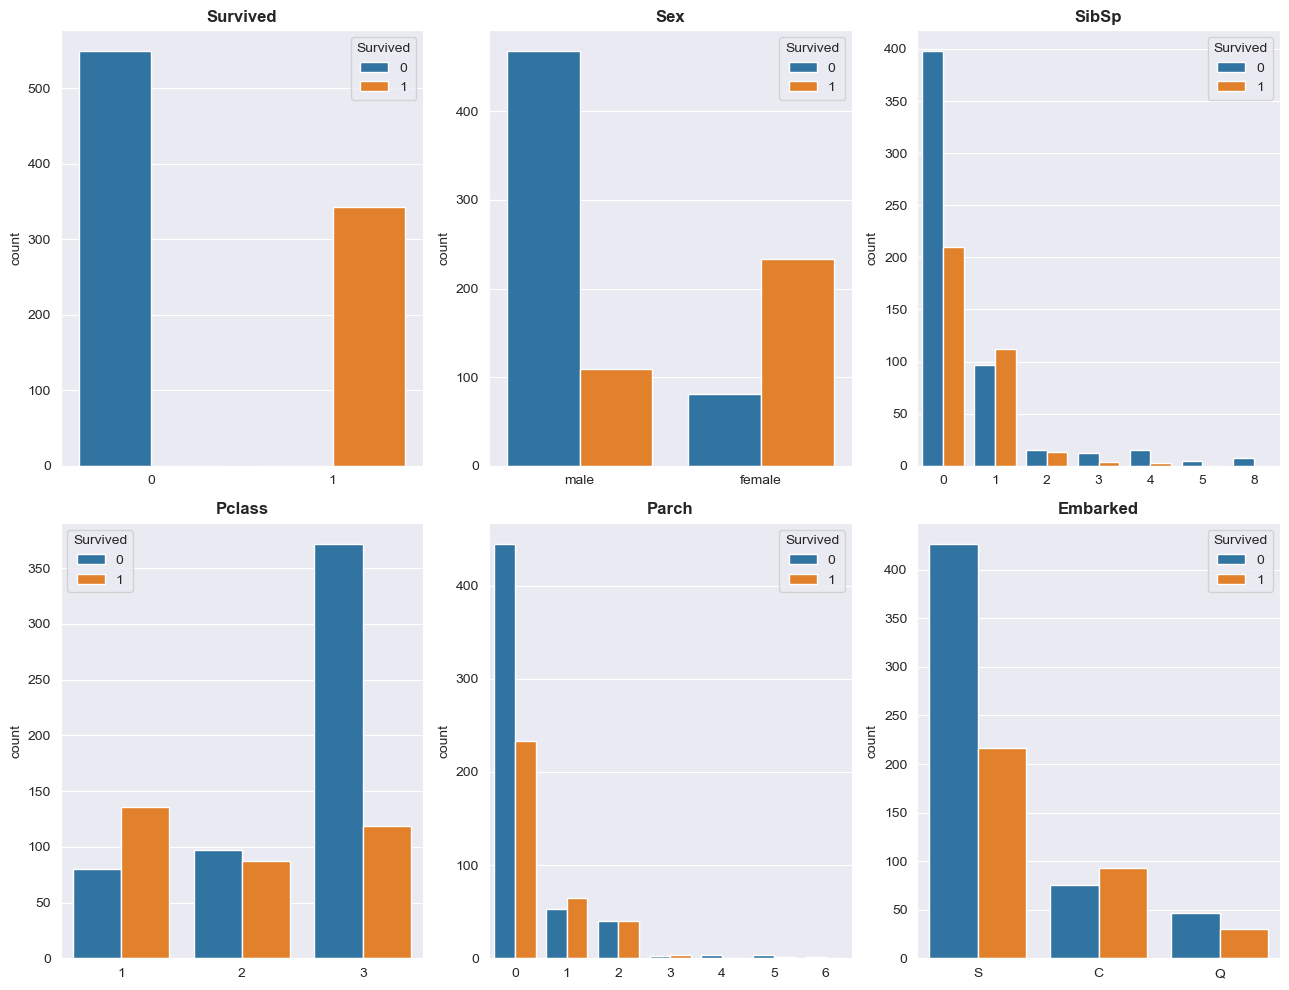

In [15]:
columns=['Survived','Pclass','Sex','Parch','SibSp','Embarked']

n_rows=2
n_cols=3

# Create a figure and subplot object
sns.set_style('darkgrid')
fig,axes=plt.subplots(n_rows,n_cols,figsize=(13,10))


for r in range(n_rows):
    for c in range(n_cols):
        axis=axes[r][c]
        sns.countplot(x=columns[r+c*n_rows],data=train_df,hue='Survived',ax=axis)
        axis.set_title(columns[r+c*n_rows],fontweight='semibold')
        axis.set_xlabel('')
        
plt.tight_layout()

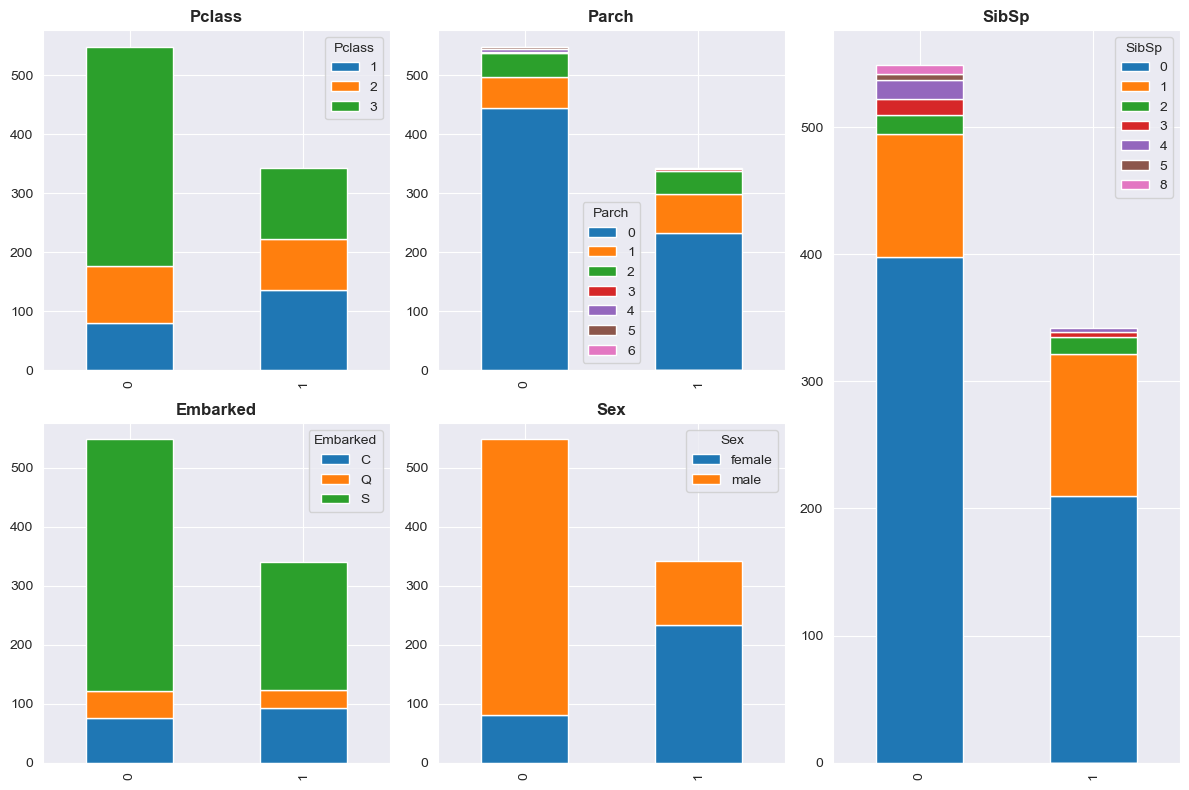

In [16]:
columns=['Pclass','Parch','Embarked','Sex','SibSp']

n_rows=2
n_cols=3

# Create a figure and subplot object
fig=plt.figure(figsize=(12,8))
ax1=plt.subplot(231);ax2=plt.subplot(232);ax3=plt.subplot(234);ax4=plt.subplot(235);ax5=plt.subplot(133)
ax=[ax1,ax2,ax3,ax4,ax5]

for axis in ax:
        group=train_df.groupby([columns[ax.index(axis)],'Survived'])
        group1=group.size().reset_index().pivot(columns=columns[ax.index(axis)],index='Survived',values=0)
        group1.plot(kind='bar', stacked=True,ax=axis)
        sns.set_style('darkgrid')
        axis.set_title(columns[ax.index(axis)],fontweight='semibold')
        axis.set_xlabel('')
        
plt.tight_layout()

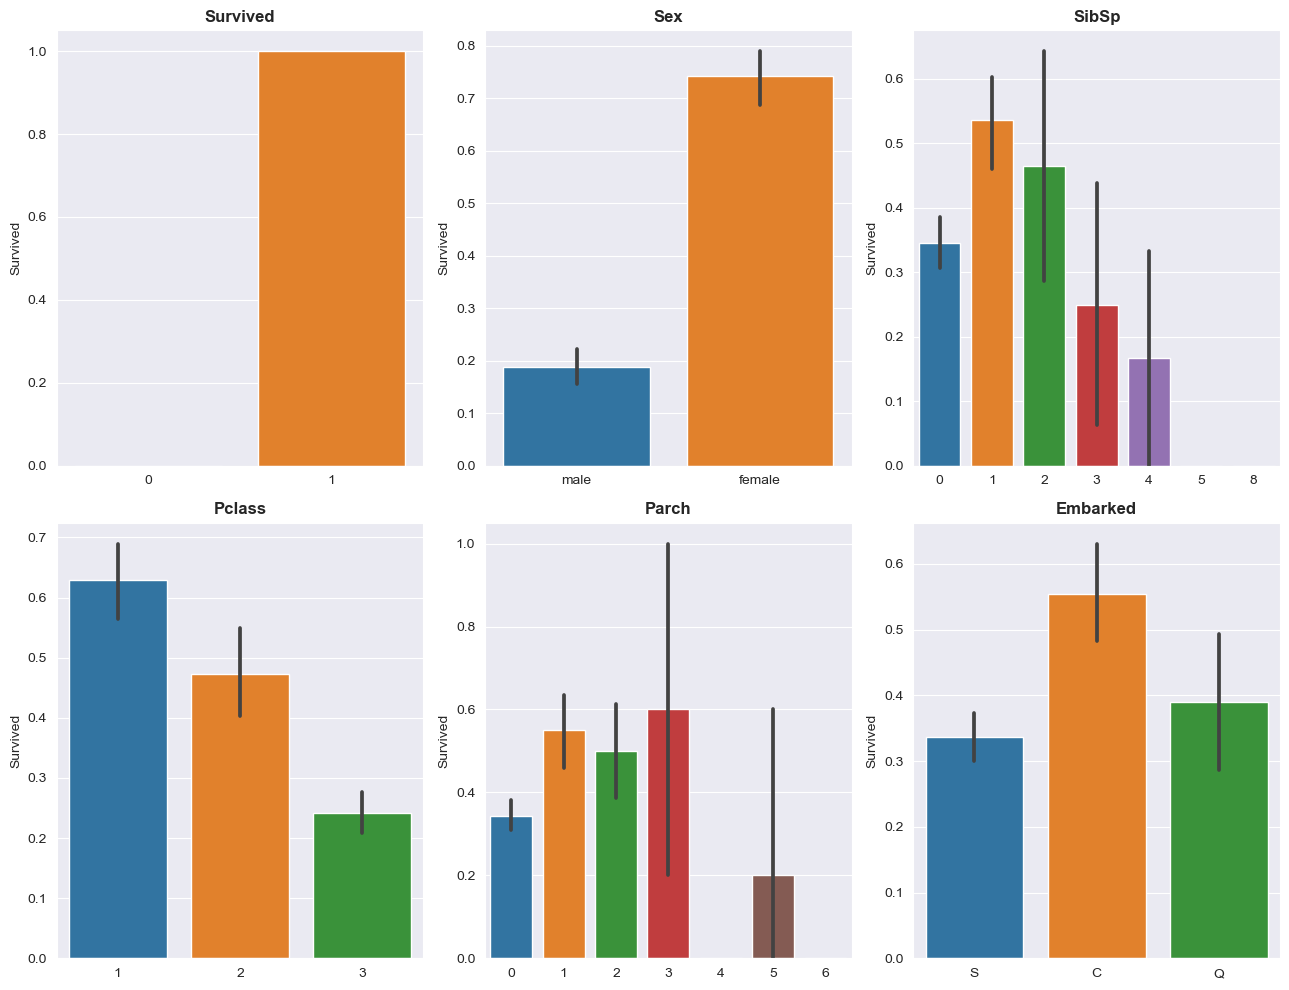

In [17]:
'''Plot for categorical columns'''
columns=['Survived','Pclass','Sex','Parch','SibSp','Embarked']

n_rows=2
n_cols=3

# Create a figure and subplot object
fig,axes=plt.subplots(n_rows,n_cols,figsize=(13,10))

for r in range(n_rows):
    for c in range(n_cols):
        axis=axes[r][c]
        sns.barplot(x=columns[r+c*n_rows],y='Survived',data=train_df,ax=axis)
        axis.set_title(columns[r+c*n_rows],fontweight='semibold')
        axis.set_xlabel('')
        
plt.tight_layout()

In [18]:
columns=['Pclass','Parch','Embarked','Sex','SibSp']

print('******************************************************')
print('Total No. of Passengers :: %d' %(train_df['Survived'].value_counts().sum()))
print('No. of Passengers who survived :: {:d} ({:.2%})'.format(train_df['Survived'].value_counts()[1],train_df['Survived'].value_counts()[1]/train_df['Survived'].value_counts().sum()))
print("No. of Passengers who didn't survived :: {:d} ({:.2%})".format(train_df['Survived'].value_counts()[0],train_df['Survived'].value_counts()[0]/train_df['Survived'].value_counts().sum()))
print('******************************************************')

for c in columns:
    group=train_df.groupby([c]).count()
    group1=train_df.groupby([c,'Survived']).count()
    cat=group.index
    cat1=group1.index
    print('------------------------------------------------------')
    print('          By category : {:s}      '.format(c))
    print('------------------------------------------------------')
    for r,q in zip(cat,cat1):
        total_nos=group.loc[r]['PassengerId']
        try: nos=group1.loc[(r,1)]['PassengerId']
        except: nos=0
        print('Number of passengers : {:s}-{:s} :: {:d}  (Survival Rate - {:.2%})'.format(cat.name,str(r),total_nos,nos/total_nos))

******************************************************
Total No. of Passengers :: 891
No. of Passengers who survived :: 342 (38.38%)
No. of Passengers who didn't survived :: 549 (61.62%)
******************************************************
------------------------------------------------------
          By category : Pclass      
------------------------------------------------------
Number of passengers : Pclass-1 :: 216  (Survival Rate - 62.96%)
Number of passengers : Pclass-2 :: 184  (Survival Rate - 47.28%)
Number of passengers : Pclass-3 :: 491  (Survival Rate - 24.24%)
------------------------------------------------------
          By category : Parch      
------------------------------------------------------
Number of passengers : Parch-0 :: 678  (Survival Rate - 34.37%)
Number of passengers : Parch-1 :: 118  (Survival Rate - 55.08%)
Number of passengers : Parch-2 :: 80  (Survival Rate - 50.00%)
Number of passengers : Parch-3 :: 5  (Survival Rate - 60.00%)
Number of passeng

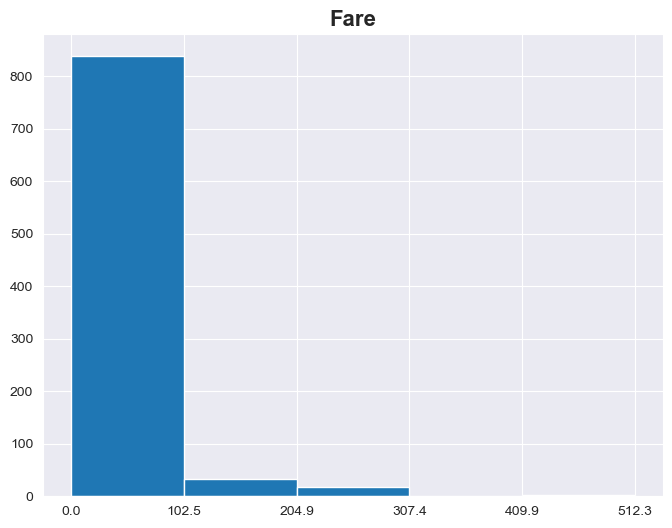

In [19]:
'''Plot for Continuous variable'''
columns=['Fare']

fig,axes=plt.subplots(1,1,figsize=(8,6))
b=5    #bins

for c in range(len(columns)):
    #sns.set_style('darkgrid')
    train_df.hist(column=columns[c],ax=axes,bins=b)
    _,bi=np.histogram(train_df[columns[c]],bins=b)
    axes.set_xticks(list(bi))
    axes.set_title(columns[c],fontweight='semibold',fontsize=16)
    axes.set_xlabel('')

In [20]:
Training=train_df.copy()
Test=test_df.copy() 

In [21]:
Training['RelativesOnBoard']=Training['SibSp']+Training['Parch'] 
Test['RelativesOnBoard']=Test['SibSp']+Test['Parch'] 
Training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativesOnBoard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [22]:
Training[['RelativesOnBoard','Survived']].groupby(['RelativesOnBoard']).mean()

,Survived
RelativesOnBoard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [23]:
Training['Title']=Training['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
Test['Title']=Test['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
Training['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [24]:
#Grouping the title under 4 categories
Training['Title'].replace(['Dr','Rev','Col','Major','Sir','Capt','Jonkheer','Don','Dona'],'Others',inplace=True)
Training['Title'].replace(['Miss','Mrs','Ms','the Countess','Lady','Mlle'],'Mme',inplace=True)
Test['Title'].replace(['Dr','Rev','Col','Major','Sir','Capt','Jonkheer','Don','Dona'],'Others',inplace=True)
Test['Title'].replace(['Miss','Mrs','Ms','the Countess','Lady','Mlle'],'Mme',inplace=True)

Training['Title'].value_counts()

Mr        517
Mme       313
Master     40
Others     21
Name: Title, dtype: int64

In [25]:
Training[['Title','Survived','Age']].groupby(['Title']).mean()
#Test[['Title','Age']].groupby(['Title']).mean()

,Survived,Age
Title,,
Master,0.575000,4.574167
Mme,0.741214,27.834615
Mr,0.156673,32.368090
Others,0.285714,46.050000


In [26]:
df=Training[['Title','Survived','Age']].groupby(['Title']).mean()
Age_fill=np.array(df.Age,dtype=int) #Get Mean Age for corresponding Title category
T=np.array(df.index)  #Get Title index

for i,j in zip(Age_fill,T):
    Filled_index=Training[Training['Title']==j].fillna({'Age':i})
    Training.loc[Filled_index.index]=Filled_index
    Filled_index=Test[Test['Title']==j].fillna({'Age':i})
    Test.loc[Filled_index.index]=Filled_index

In [27]:
#Grouping Age variable into groups
Training['AgeBucket']=Training['Age']//15*15
Test['AgeBucket']=Test['Age']//15*15

Training[['AgeBucket','Survived']].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.573171
15.0,0.409471
30.0,0.314371
45.0,0.400000
60.0,0.240000
75.0,1.000000


In [28]:
Training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativesOnBoard,Title,AgeBucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,15.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mme,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Mme,15.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mme,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Others,15.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Mme,15.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,NaN,S,3,Mme,15.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Mr,15.0


In [29]:
one_hot_columns=['Sex','Title','Pclass','Embarked']

for c in one_hot_columns:
    Training=pd.get_dummies(Training,columns=[c])
    Test=pd.get_dummies(Test,columns=[c])
    #train_df1[c],unique=pd.factorize(train_df1[c])  

C:\Users\MAYANK KUMAR\AppData\Local\Temp\ipykernel_6484\2849112774.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=train_df[['Pclass','Parch','Embarked','Sex','SibSp']].corr()


Text(0.5, 1.0, 'Correlation Matrix')

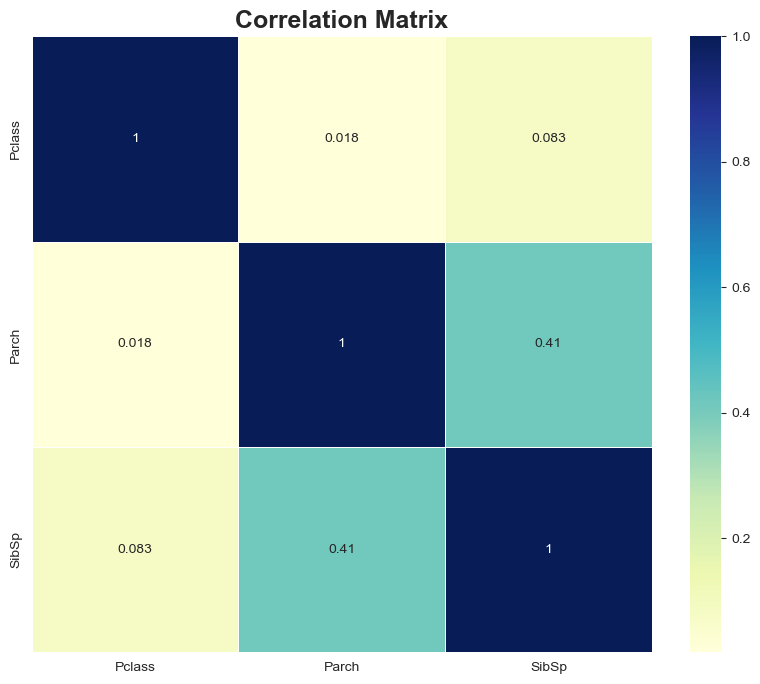

In [30]:
corr_matrix=train_df[['Pclass','Parch','Embarked','Sex','SibSp']].corr()
fig,axis=plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True,ax=axis,cmap="YlGnBu",linewidth=.5,linecolor='white')
axis.set_title('Correlation Matrix',fontweight='semibold',fontsize=18)

In [31]:
Training.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)
Test.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [32]:
#Convert Pandas Df to Numpy array
X=Training.drop(['Survived'],axis=1).to_numpy(dtype=float)    #Dropping Output from training dataset
Y=Training['Survived'].to_numpy()

In [33]:
model=LogisticRegression(C=1,max_iter=1000)
model.fit(X,Y)

Score=model.score(X,Y)

print('Score for Logistic Regression model is :: {:.2f}'.format(Score*100))

Score for Logistic Regression model is :: 83.16


In [34]:
Test

,RelativesOnBoard,AgeBucket,Sex_female,Sex_male,Title_Master,Title_Mme,Title_Mr,Title_Others,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,30.0,0,1,0,0,1,0,0,0,1,0,1,0
1,1,45.0,1,0,0,1,0,0,0,0,1,0,0,1
2,0,60.0,0,1,0,0,1,0,0,1,0,0,1,0
3,0,15.0,0,1,0,0,1,0,0,0,1,0,0,1
4,2,15.0,1,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,30.0,0,1,0,0,1,0,0,0,1,0,0,1
414,0,30.0,1,0,0,0,0,1,1,0,0,1,0,0
415,0,30.0,0,1,0,0,1,0,0,0,1,0,0,1
416,0,30.0,0,1,0,0,1,0,0,0,1,0,0,1


In [35]:
Predictions=model.predict(Test)

Output_df=pd.DataFrame({'PassengerId':test_df.PassengerId, 'Survived':Predictions})

Output_df.to_csv('Output.csv',index=0)

print('-------------------------------------------------')
print('Output CSV file is submitted...')

-------------------------------------------------
Output CSV file is submitted...


C:\Users\MAYANK KUMAR\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
